In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
# feel free to add more if you need

In [31]:
# load data
data_raw = pd.read_csv('/Users/Patron/Documents/Machine Learning /DataCo Supply chain for Big Analysis/DataCoSupplyChainDataset.csv', encoding = "ISO-8859-1")

# load data description
data_description = pd.read_csv('/Users/Patron/Documents/Machine Learning /DataCo Supply chain for Big Analysis/DescriptionDataCoSupplyChain.csv', encoding = "ISO-8859-1")

Learning the Variables

Are all the features going to be helpful for our prediction task? In other words, do you expect any correlation or dependencies between the response variables and custormers' information (i.e. Custormer ID, Custormer Email, etc.)? 
<br>
If not, then we may consider remove some of the redundant variables (categorical and continuous).

In [32]:
data_raw.select_dtypes(include = ["object"]).columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [33]:
data_raw.select_dtypes(include = ["object"])

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Shanghái,China,1/16/2016 3:40,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Hirakata,Japón,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [35]:
# removing redundant categorical features for modeling
remove_cat = ['Category Name', 'Customer City', 
               'Customer Country', 'Customer Email', 
               'Customer Fname', 'Customer Lname', 
               'Customer Password', 'Customer State',
               'Customer Street', 'Department Name',
               'Market', 'Order City', 'Order Country',
               'Order Region', 'Order State', 'Product Image',
               'Product Name']

In [36]:
data_raw.select_dtypes(exclude = ["object"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [37]:
data_raw.select_dtypes(exclude = ["object"])

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


In [38]:
# removing redundant continuous features for modeling
remove_cts = ['Category Id', 'Customer Id', 'Customer Zipcode',
               'Department Id', 'Customer Id', 'Order Id', 
               'Order Item Cardprod Id', 'Order Item Id',
               'Order Zipcode', 'Product Card Id', 'Product Category Id',
               'Product Description', 'Product Status', 'Latitude', 'Longitude', 
               'Order Customer Id']

Now, let's do a brief EDA and prepare our data for modeling

Check for missing values

In [39]:
data_raw.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Check for duplicate observations

In [16]:
data_raw.duplicated().any()

False

Remove redundant categorical and continuous features for modeling

In [40]:
remove_list = remove_cat + remove_cts
data_raw.drop(remove_list, axis=1, inplace=True)

# check the dimension of the data
data_raw.shape

(180519, 21)

Check for missing values after removing redundent features

In [41]:
data_raw.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Customer Segment                 0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Status                     0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

Plot a correlation heatmap

<Axes: >

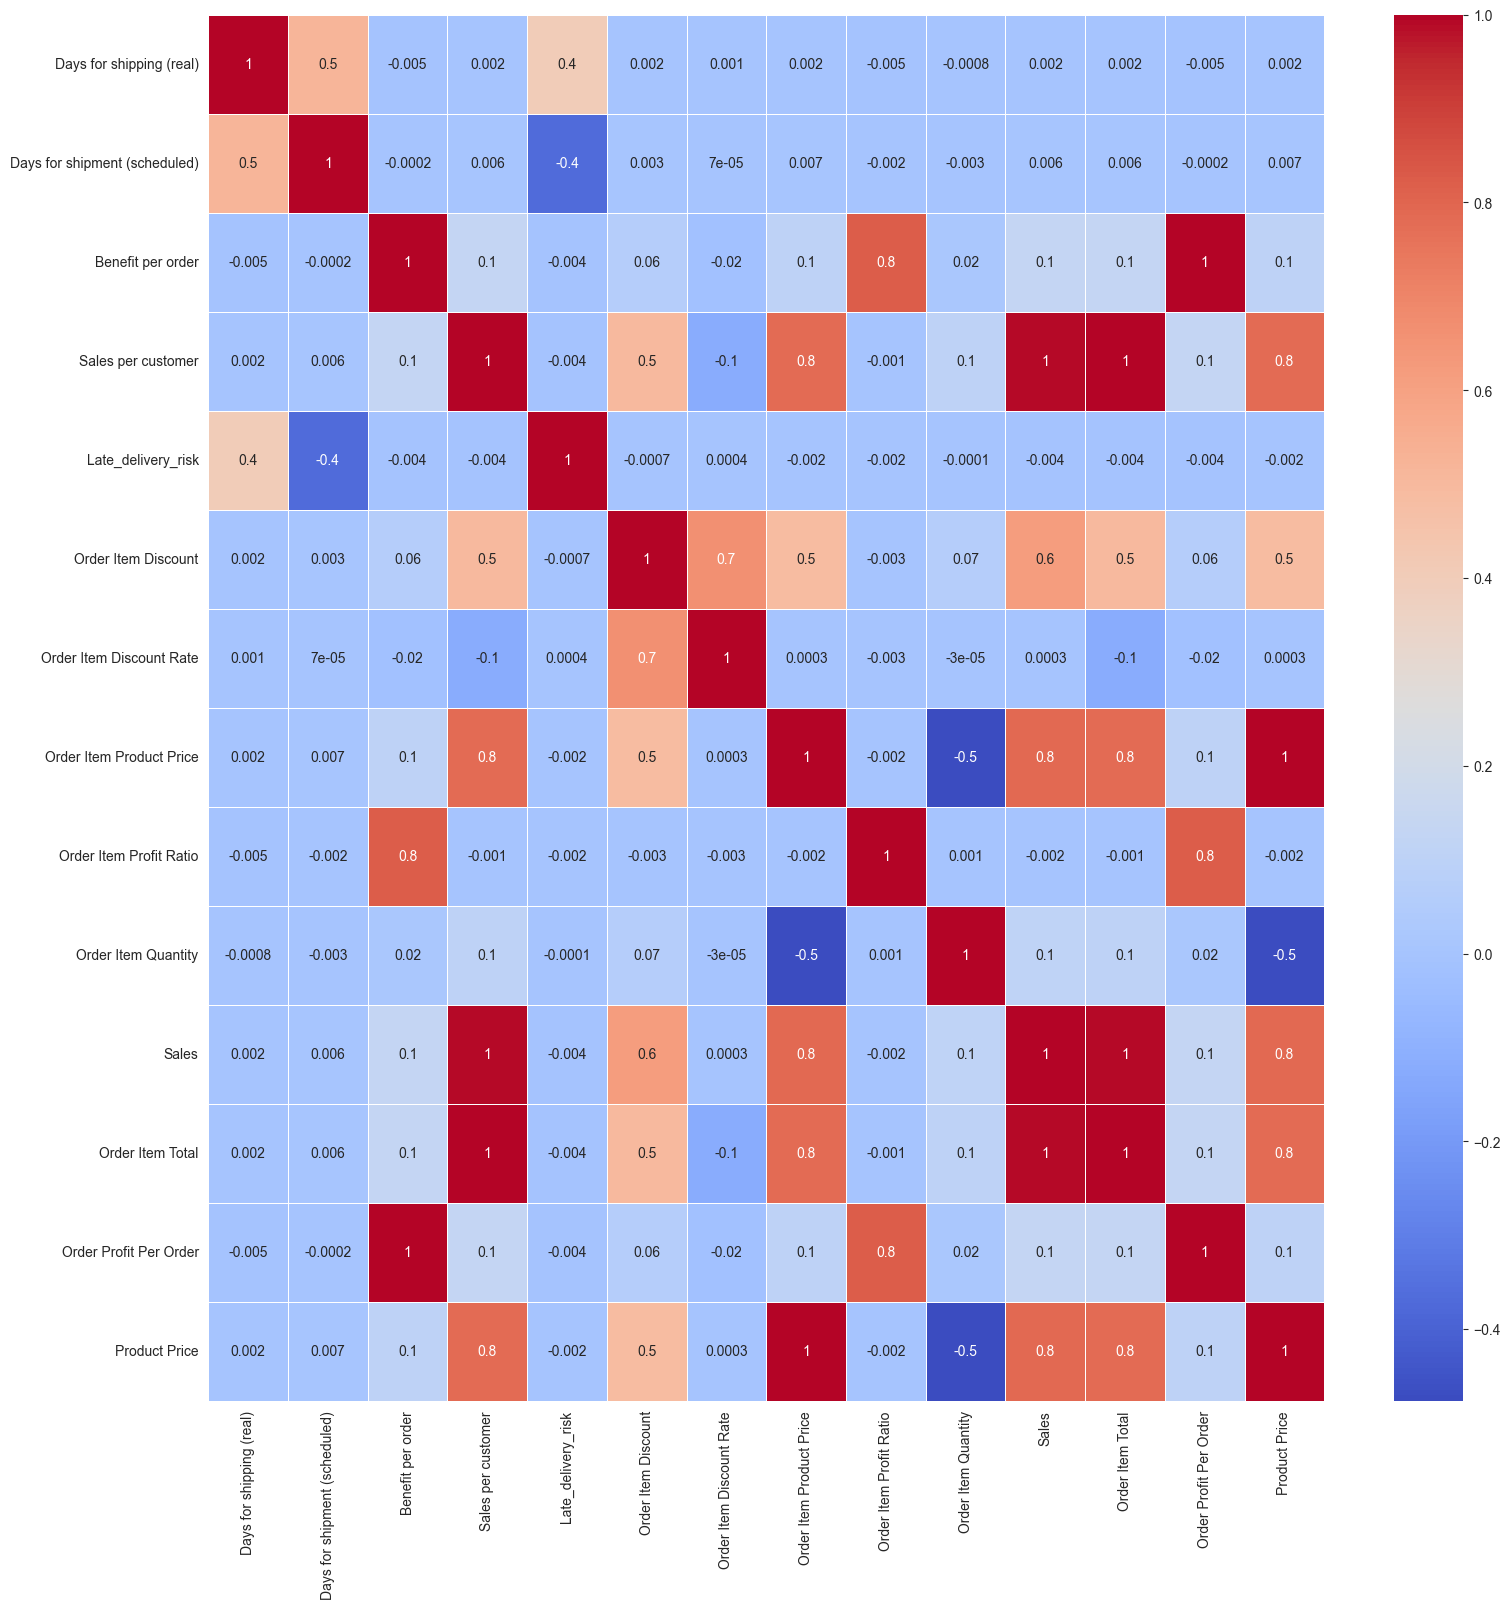

In [42]:
fig, ax = plt.subplots(figsize = (18, 18))   
sns.heatmap(data_raw.select_dtypes(exclude=['object']).corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

Encodings

In [43]:
# one-hot encoding for categorical variables
ohe_data = pd.get_dummies(data_raw, columns = ['Type', 'Shipping Mode'])
ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']] = ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']].astype(int)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Customer Segment               180519 non-null  object 
 7   order date (DateOrders)        180519 non-null  object 
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Discount Rate       180519 non-null  float64
 10  Order Item Product Price       180519 non-null  float64
 11  Order Item Profit Ratio        180519 non-null  float64
 12  Order Item Quantity           

Detect / Remove / Replace Outliers (if any)

In [44]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include = ["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<Axes: xlabel='value', ylabel='variable'>

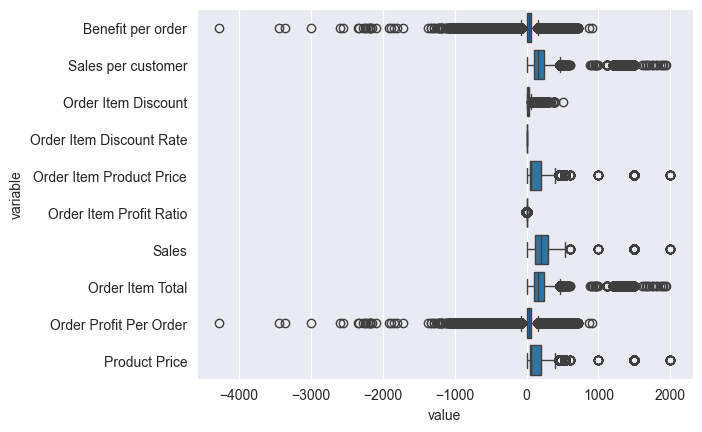

In [46]:
sns.boxplot(y='variable', x='value', data = data_melted)

In [47]:
# Z-score
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from Z-scores method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
10 Outliers Sample in ' Benefit per order ' from Z-scores method:  [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


Outliers length in ' Sales per customer ' from Z-scores method:  477
10 Outliers Sample in ' Sales per customer ' from Z-scores method:  [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


Outliers length in ' Order Item Discount ' from Z-scores method:  2106
10 Outliers Sample in ' Order Item Discount ' from Z-scores method:  [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 99.98999786, 89.98999786, 89.98999786, 89.98999786]


Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from Z-scores method:  []


Outliers length in ' Order Item Product Price ' from Z-scores method:  488
10 Outliers Sample in '

In [48]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  18942
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-4274.97998, -3442.5, -3366.0, -3000.0, -2592.0, -2550.0, -2351.25, -2328.0, -2280.0, -2255.25]


Outliers length in ' Sales per customer ' from IQR method:  1943
10 Outliers Sample in ' Sales per customer ' from IQR method:  [463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963]


Outliers length in ' Order Item Discount ' from IQR method:  7537
10 Outliers Sample in ' Order Item Discount ' from IQR method:  [67.48999786, 67.48999786, 67.48999786, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756]


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  2048
10 Outliers Sample in ' Order Item Pr

In [49]:
# Removing outliers from z-score method and replacing the removed with median
for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    median = np.median(ohe_data[i])
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    for j in sample_outliers:
        ohe_data.loc[ohe_data[i] == j, i] = median
    print('Outliers have been removed and replaced with median')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
Outliers have been removed and replaced with median
Outliers length in ' Sales per customer ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount ' from Z-scores method:  2106
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Product Price ' from Z-scores method:  488
Outliers have been removed and replaced with median
Outliers length in ' Order Item Profit Ratio ' from Z-scores method:  6013
Outliers have been removed and replaced with median
Outliers length in ' Sales ' from Z-scores method:  467
Outliers have been removed and replaced with median
Outliers length in ' Order Item Total ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Pr

In [68]:
#Converting order date and shipping date features to DateTime type
ohe_data['order date (DateOrders)'] = pd.to_datetime(ohe_data['order date (DateOrders)'], errors='coerce')
ohe_data['shipping date (DateOrders)'] = pd.to_datetime(ohe_data['shipping date (DateOrders)'], errors='coerce')

#Order Shipping Gap
ohe_data['Order Shipping Gap'] = (ohe_data['shipping date (DateOrders)'] - ohe_data['order date (DateOrders)']).dt.days

#Order Month
ohe_data['Order Month'] = ohe_data['order date (DateOrders)'].dt.month

#Order Day of Week
ohe_data['Order Day of Week'] = ohe_data['order date (DateOrders)'].dt.dayofweek

#Scheduled shipping month
ohe_data['Scheduled shipping month'] = ohe_data['shipping date (DateOrders)'].dt.month

#Scheduled shipping day of week
ohe_data['Scheduled shipping day of week'] = ohe_data['shipping date (DateOrders)'].dt.dayofweek

In [56]:
import pandas as pd

# Convert date columns to datetime format
data_raw['order date (DateOrders)'] = pd.to_datetime(data_raw['order date (DateOrders)'])
data_raw['shipping date (DateOrders)'] = pd.to_datetime(data_raw['shipping date (DateOrders)'])

# Feature 1: Days between order and shipping date
data_raw['Days_Between_Order_Shipping'] = (data_raw['shipping date (DateOrders)'] - data_raw['order date (DateOrders)']).dt.days

# Feature 2: Weekday of the order (0=Monday, 6=Sunday)
data_raw['Order_Weekday'] = data_raw['order date (DateOrders)'].dt.weekday

# Feature 3: Month of the order (1=January, 12=December)
data_raw['Order_Month'] = data_raw['order date (DateOrders)'].dt.month

# Feature 4: Is the order placed on a weekend?
data_raw['Order_Weekend'] = data_raw['Order_Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Feature 5:


In [69]:
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Days for shipping (real)        180519 non-null  int64         
 1   Days for shipment (scheduled)   180519 non-null  int64         
 2   Benefit per order               180519 non-null  float64       
 3   Sales per customer              180519 non-null  float64       
 4   Delivery Status                 180519 non-null  object        
 5   Late_delivery_risk              180519 non-null  int64         
 6   Customer Segment                180519 non-null  object        
 7   order date (DateOrders)         180519 non-null  datetime64[ns]
 8   Order Item Discount             180519 non-null  float64       
 9   Order Item Discount Rate        180519 non-null  float64       
 10  Order Item Product Price        180519 non-null  float64

AUC-ROC: 0.9930


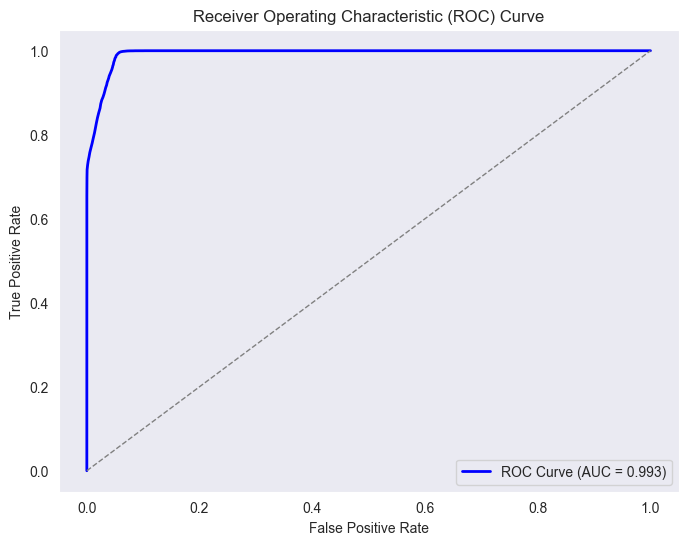

In [73]:
#Build classification model to find probability whether the delivery will be late
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

X = ohe_data.drop(['Late_delivery_risk', 'Order Profit Per Order','Order Item Total',
                   'Order Item Product Price','Order Item Profit Ratio',
                   'Delivery Status','Order Item Discount', 'Order Status',
                   'Days for shipping (real)', 'Days for shipment (scheduled)',
                   'order date (DateOrders)','shipping date (DateOrders)'], axis=1)
y = ohe_data['Late_delivery_risk']

# Ensure all categorical variables are one-hot encoded
X = pd.get_dummies(X, columns=['Customer Segment'], drop_first=True)

# Convert any remaining string data to numeric, setting errors='coerce' to handle non-numeric strings
X = X.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)

# Drop columns with NaN values if conversion failed
X = X.dropna(axis=1)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities on test and training sets
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
y_train_proba = rf_model.predict_proba(X_train)[:, 1]

# Calculate AUC-ROC score for probability predictions in test data
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"AUC-ROC: {roc_auc:.4f}")

# Compute ROC curve and AUC for plotting
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()


In [74]:
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Product Price,shipping date (DateOrders),Shipping Mode,Days_Between_Order_Shipping,Order_Weekday,Order_Month,Order_Weekend,Is_Discounted,Customer_Segment_Code,Order_Profit_Percentage
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,327.75,2018-02-03 22:56:00,Standard Class,3,2,1,0,1,0,28.999999
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,327.75,2018-01-18 12:27:00,Standard Class,5,5,1,1,1,0,-80.000001
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,327.75,2018-01-17 12:06:00,Standard Class,4,5,1,1,1,0,-80.000001
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,327.75,2018-01-16 11:45:00,Standard Class,3,5,1,1,1,2,8.000000
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,327.75,2018-01-15 11:24:00,Standard Class,2,5,1,1,1,1,44.999999


In [75]:
# Expected payout per customer, using each customer's specific probability of late delivery
expected_payout_per_policy_test = y_test_proba * 100
expected_payout_per_policy_train = y_train_proba * 100

# Fixed expense per policy
fixed_expense = 10

# Calculate break-even premium for each customer
break_even_premium_per_policy_test = expected_payout_per_policy_test + fixed_expense
break_even_premium_per_policy_train = expected_payout_per_policy_train + fixed_expense

# Apply a 5% profit load to each customer's break-even premium
profit_load = 0.05  # standard 5% profit load
premium_with_profit_per_policy_test = break_even_premium_per_policy_test * (1 + profit_load)
premium_with_profit_per_policy_train = break_even_premium_per_policy_train * (1 + profit_load)

# Total revenue and expected payout in training data to check break-even
total_revenue_train = premium_with_profit_per_policy_train.sum()
total_expected_payout_train = expected_payout_per_policy_train.sum() + (fixed_expense * len(y_train_proba))

# Total revenue and expected payout in test data to check break-even
total_revenue_test = premium_with_profit_per_policy_test.sum()
total_expected_payout_test = expected_payout_per_policy_test.sum() + (fixed_expense * len(y_test_proba))
#break_even_test = total_revenue >= total_expected_payout

# Print results
print('Average Break-even Premium per Customer (test):', break_even_premium_per_policy_test.mean())
print('Average Premium with 5% profit margin per Customer (test):', premium_with_profit_per_policy_test.mean())
print('Average Break-even Premium per Customer (train):', break_even_premium_per_policy_train.mean())
print('Average Premium with 5% profit margin per Customer (train):', premium_with_profit_per_policy_train.mean())


print('Total Revenue (training data):', total_revenue_train)
print('Total Expected Payout (training data):', total_expected_payout_train)
print('Total Revenue (test data):', total_revenue_test)
print('Total Expected Payout (test data):', total_expected_payout_test)


#print('Break-even Test (Revenue >= Expected Payout):', break_even_test)


Average Break-even Premium per Customer (test): 64.69403205554325
Average Premium with 5% profit margin per Customer (test): 67.92873365832041
Average Break-even Premium per Customer (train): 64.71618274336633
Average Premium with 5% profit margin per Customer (train): 67.95199188053465
Total Revenue (training data): 8586617.55
Total Expected Payout (training data): 8177731.0
Total Revenue (test data): 3678748.5
Total Expected Payout (test data): 3503570.0


In [76]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score


In [77]:
# Train SVM classifier with a linear kernel (you can also try other kernels, e.g., 'rbf')
svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_svm = svm_model.predict(X_test)
y_test_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate accuracy and F1 score
svm_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_f1 = f1_score(y_test, y_test_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy:.4f}")
print(f"SVM Model F1 Score: {svm_f1:.4f}")

# Calculate AUC-ROC score for probability predictions
roc_auc_svm = roc_auc_score(y_test, y_test_proba_svm)
print(f"SVM Model AUC-ROC: {roc_auc_svm:.4f}")


SVM Model Accuracy: 0.9506
SVM Model F1 Score: 0.9549
SVM Model AUC-ROC: 0.9605


In [78]:
# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_nb = nb_model.predict(X_test)
y_test_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy and F1 score
nb_accuracy = accuracy_score(y_test, y_test_pred_nb)
nb_f1 = f1_score(y_test, y_test_pred_nb)
print(f"Naive Bayes Model Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes Model F1 Score: {nb_f1:.4f}")

# Calculate AUC-ROC score for probability predictions
roc_auc_nb = roc_auc_score(y_test, y_test_proba_nb)
print(f"Naive Bayes Model AUC-ROC: {roc_auc_nb:.4f}")


Naive Bayes Model Accuracy: 0.7799
Naive Bayes Model F1 Score: 0.7763
Naive Bayes Model AUC-ROC: 0.9004


SVM Model AUC-ROC: 0.9605
Naive Bayes Model AUC-ROC: 0.9004


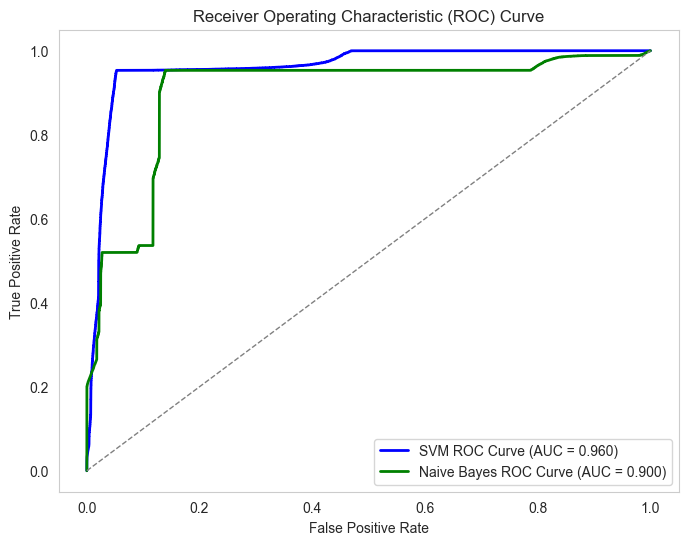

In [79]:
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt

# ----- SVM Model -----
# Train SVM classifier with a linear kernel
svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict probabilities on test set
y_test_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_test_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print(f"SVM Model AUC-ROC: {roc_auc_svm:.4f}")

# ----- Naive Bayes Model -----
# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_test_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_test_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print(f"Naive Bayes Model AUC-ROC: {roc_auc_nb:.4f}")

# ----- Plotting ROC Curves -----
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC Curve (AUC = {roc_auc_svm:.3f})')
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes ROC Curve (AUC = {roc_auc_nb:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [88]:
!pip install lightgbm


zsh:1: command not found: pip


In [89]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

# Train LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data], early_stopping_rounds=10, verbose_eval=False)

# Predict probabilities on test set
y_test_proba_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Calculate AUC-ROC for LightGBM
roc_auc_lgb = roc_auc_score(y_test, y_test_proba_lgb)
print(f"LightGBM Model AUC-ROC: {roc_auc_lgb:.4f}")

# Compute ROC curve for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_test_proba_lgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='purple', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgb:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


OSError: dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib
  Referenced from: <D3923ACB-D836-32D3-A031-CF91999FDAFC> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.dylib
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file)